In [12]:
@hello
def print_hello():
    print(hello)


NameError: name 'hello' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from game import *
from models import *

%matplotlib inline

In [2]:
G = game.nations['G']

In [3]:
G.create_unit(name='mil_123', unit_type="militia", position='a1')
G.create_unit(name='mil_124', unit_type="militia", position='a1')
G.create_unit(name='art_001', unit_type="artillery", position='a1')
G.create_unit(name='art_002', unit_type="artillery", position='a1')
G.create_unit(name='inf_001', unit_type="infantry", position='a1')

In [4]:
game.db.query("select * from units")

,id,game_id,name,nation,unit_type,position,status,base_mu,base_sigma,training,leadership,terrain,morale,experience,attacking,defending
0,1,1,mil_123,G,militia,a1,1,5,10,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-5, 0)","(5, 5)"
1,2,1,mil_124,G,militia,a1,1,5,10,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-5, 0)","(5, 5)"
2,3,1,art_001,G,artillery,a1,1,30,10,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(10, 5)","(0, 0)"
3,4,1,art_002,G,artillery,a1,1,30,10,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(10, 5)","(0, 0)"
4,5,1,inf_001,G,infantry,a1,1,10,5,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-1, 2)","(3, 0)"


In [8]:
log = game.db.query("select * from game_log")

In [11]:
log.loc[14, 'details']

"{'name': 'mil_123', 'unit_type': 'militia', 'position': 'a1', 'nation': 'G', 'status': 1, 'additive': 'training', 'additive_val': (100, 100)}"

In [8]:
mil_123 = G.units()['mil_123']
art_002 = G.units()['mil_123']

In [9]:
art_002.reserve_cost

0

In [6]:
G.alter_unit_additive(name='mil_123',additive='training', mu=100, sigma=100)

In [8]:
G.infantry_units_names

['test']

In [15]:
game.db.query(query="select * from units")

,id,game_id,name,nation,unit_type,position,status,base_mu,base_sigma,training,leadership,terrain,morale,experience,attacking,defending
0,1,1,test,G,infantry,a1,1,10,5,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-1, 2)","(3, 0)"
1,2,1,mil_123,G,militia,a1,1,5,10,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-5, 0)","(5, 5)"
2,3,1,inf_100,U,infantry,a1,1,10,5,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-1, 2)","(3, 0)"
3,4,1,inf_101,U,infantry,a1,1,10,5,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-1, 2)","(3, 0)"
4,5,1,art_100,U,artillery,a3,1,30,10,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(10, 5)","(0, 0)"
5,6,1,inf_r200,R,infantry,a1,1,10,5,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-1, 2)","(3, 0)"
6,7,1,mil_r100,R,militia,a2,1,5,10,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-5, 0)","(5, 5)"
7,8,1,mil_r101,R,militia,a2,1,5,10,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-5, 0)","(5, 5)"
8,9,1,mil_r102,R,militia,a2,1,5,10,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(-5, 0)","(5, 5)"


In [10]:
game.positions

{'a1': <game.Position at 0x113ded908>,
 'a2': <game.Position at 0x113ded9b0>,
 'a3': <game.Position at 0x113deda90>,
 'a4': <game.Position at 0x113dedb70>,
 'a5': <game.Position at 0x113dedc50>}

In [11]:
game.nations

{'G': <game.Nation at 0x113ded748>,
 'R': <game.Nation at 0x113ded828>,
 'U': <game.Nation at 0x113ded6d8>}

In [12]:
u = game.nations['U']
r = game.nations['R']

In [13]:
u.create_unit(name='inf_100', unit_type='infantry', position='a1')
u.create_unit(name='inf_101', unit_type='infantry', position='a1')
u.create_unit(name='art_100', unit_type='artillery', position='a3')

In [14]:
r.create_unit(name='inf_r200', unit_type='infantry', position='a1')
r.create_unit(name='mil_r100', unit_type='militia', position='a2')
r.create_unit(name='mil_r101', unit_type='militia', position='a2')
r.create_unit(name='mil_r102', unit_type='militia', position='a2')

In [16]:
r.alter_unit_additive(name='mil_r100', additive='training', mu=10, sigma=1)

In [17]:
attack_units = ['art_100', 'inf_100']

In [18]:
attack_units_obj = [u.units()[i] for i in attack_units]

In [19]:
a2 = game.positions['a2']
print("ATTACKER")
for unit in attack_units_obj:
    print(unit.get_attributes())
    print("\n")

print("---------------------------------------------")

print("DEFENDER")
for unit in a2.current_occupying_units()[1]:
    print(unit.get_attributes())
    print("\n")
    
    



ATTACKER
name  :  art_100
unit_type  :  artillery
base_mu  :  30
base_sigma  :  10
position  :  a3
nation  :  U
status  :  1
training  :  (0, 0)
leadership  :  (0, 0)
terrain  :  (0, 0)
morale  :  (0, 0)
experience  :  (0, 0)
attacking  :  (10, 5)
defending  :  (0, 0)
final_attack_attributes :  {'mu': 40, 'sigma': 15}
final_defense_attributes :  {'mu': 30, 'sigma': 10}
None


name  :  inf_100
unit_type  :  infantry
base_mu  :  10
base_sigma  :  5
position  :  a1
nation  :  U
status  :  1
training  :  (0, 0)
leadership  :  (0, 0)
terrain  :  (0, 0)
morale  :  (0, 0)
experience  :  (0, 0)
attacking  :  (-1, 2)
defending  :  (3, 0)
final_attack_attributes :  {'mu': 9, 'sigma': 7}
final_defense_attributes :  {'mu': 13, 'sigma': 5}
None


---------------------------------------------
DEFENDER
name  :  mil_r100
unit_type  :  militia
base_mu  :  5
base_sigma  :  10
position  :  a2
nation  :  R
status  :  1
training  :  (10, 1)
leadership  :  (0, 0)
terrain  :  (0, 0)
morale  :  (0, 0)
experie

In [21]:
u.attack(units=attack_units, attack_position='a2')

11.6011612873816
draw
None


In [1909]:
battle1 = Battle(attacker='u', defender='r', attacker_units=[inf_1, art_1, art_2], defender_units=[inf_2, mil_1, mil_2], position='a2')


In [1910]:
attacker_combined, defender_combined = battle1.combined_score_distribution()
for u in battle1.attacker_units:
    print(u.name, u.unit_type, u.nation, u.status)
    print(u.current_additives())
    print(u.battle_attributes())

    print("\n")
print(attacker_combined)
    
print("\n")
print("-----------------------------------------")
for u in battle1.defender_units:
    print(u.name, u.unit_type, u.nation, u.status)
    print(u.current_additives())
    print(u.battle_attributes())
    
    print("\n")
print(defender_combined)

print("\n")
print(battle1.battle_thresholds())

inf_1 infantry u 1
{'training': (20, -2), 'leadership': (0, 0), 'terrain': (0, 0), 'morale': (0, 0), 'experience': (0, 0)}
{'mu': 30, 'sigma': 3}


art_1 artillery u 1
{'training': (0, 0), 'leadership': (0, 0), 'terrain': (0, 0), 'morale': (0, 0), 'experience': (0, 0)}
{'mu': 30, 'sigma': 10}


art_2 artillery u 1
{'training': (0, 0), 'leadership': (0, 0), 'terrain': (0, 0), 'morale': (0, 0), 'experience': (0, 0)}
{'mu': 30, 'sigma': 10}


(90, 14.45683229480096)


-----------------------------------------
inf_2 infantry r 1
{'training': (0, 0), 'leadership': (20, 6), 'terrain': (6, 0), 'morale': (40, 20), 'experience': (0, 0)}
{'mu': 76, 'sigma': 31}


mil_1 militia r 1
{'training': (0, 0), 'leadership': (0, 0), 'terrain': (0, 0), 'morale': (0, 0), 'experience': (0, 0)}
{'mu': 5, 'sigma': 10}


mil_2 militia r 1
{'training': (0, 0), 'leadership': (0, 0), 'terrain': (0, 0), 'morale': (0, 0), 'experience': (0, 0)}
{'mu': 5, 'sigma': 10}


(86, 34.07345007480164)


{'rout': 75.3211971907

In [1916]:
br = battle1.battle()[2]
print(br)
battle1.battle_results(battle_results=br)


5.872987133096217
draw


In [1650]:
print(inf_1.current_additives())
print(art_1.current_additives())

{'training': (1, -1), 'leadership': (0, 0), 'terrain': (0, 0), 'morale': (5, 0), 'experience': (0, 0)}
{'training': (0, 0), 'leadership': (0, 0), 'terrain': (0, 0), 'morale': (5, 0), 'experience': (0, 0)}


In [1637]:
print(inf_1.current_additives())
print(art_1.current_additives())

{'training': (1, -1), 'leadership': (0, 0), 'terrain': (0, 0), 'morale': (15, 0), 'experience': (0, 0)}
{'training': (0, 0), 'leadership': (0, 0), 'terrain': (0, 0), 'morale': (15, 0), 'experience': (0, 0)}


In [1635]:
print(inf_2.current_additives())

{'training': (0, 0), 'leadership': (10, 3), 'terrain': (3, 0), 'morale': (15, 10), 'experience': (0, 0)}


In [1640]:
print(inf_2.current_additives())

{'training': (0, 0), 'leadership': (10, 3), 'terrain': (3, 0), 'morale': (15, 10), 'experience': (0, 0)}


In [1639]:
print(inf_2.status)

0


/Users/wcasey/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


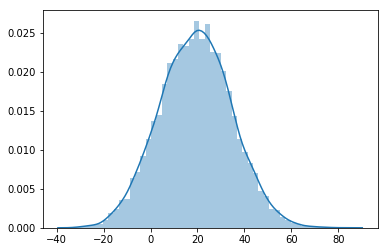

In [1423]:
sns.distplot([battle1.battle()[2] for i in range(10000)])

In [1422]:
battle1.battle_thresholds()

{'draw': 6.689302905052225,
 'rout': 26.7572116202089,
 'victory': 13.37860581010445}

attacker rout


In [1316]:
battle1.combined_score_distribution()

((41, 10.770329614269007), (20, 8.0))

/Users/wcasey/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


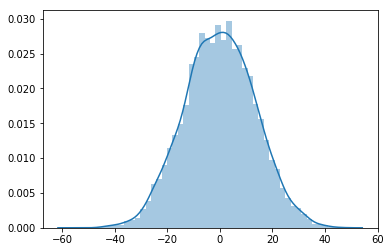

In [1305]:
sns.distplot(battle1.simulate_even_outcome_battle())

{'draw': 6.642302127225772,
 'rout': 26.56920850890309,
 'victory': 13.284604254451544}

In [1292]:
np.std(battle1.simulate_even_outcome_battle())

13.359257065245423

In [1248]:
newsigma = np.sqrt((10)**2 + (4)**2)
newmu = 11 + 30

In [1293]:
simulation = [(np.random.normal(loc=newmu, scale=newsigma) - np.random.normal(loc=newmu, scale=8)) for i in range(10000)]

In [1294]:
simulation_std = np.std(simulation)

In [1296]:
simulation_std

13.583159043034707

/Users/wcasey/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


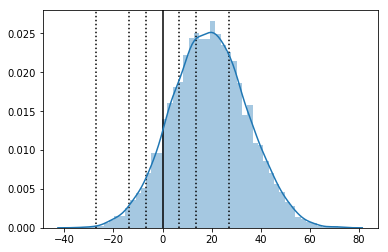

In [1307]:
vertlines = [simulation_std, -1*simulation_std, simulation_std*2, -2*simulation_std, 0.5*simulation_std, -0.5*simulation_std]
for lines in vertlines:
    plt.axvline(x=lines, ls=':', color='black')
plt.axvline(x=0, color='black')
# sns.distplot(simulation)
sns.distplot([battle1.battle()[2] for i in range(10000)])

In [1204]:
battle1.battle()[2]

2.030847347246983

/Users/wcasey/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


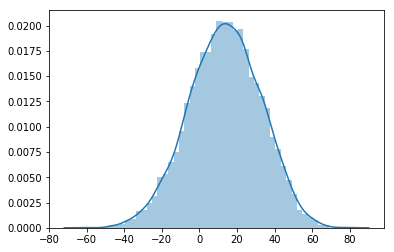

In [1082]:
E_X = np.mean([battle1.battle()[2] for i in range(10000)]) 

In [1083]:
std_X = np.std([battle1.battle()[2] for i in range(10000)])

In [1085]:
(E_X - std_X, E_X + std_X)

(-5.53122403292722, 32.672970594453396)

In [1050]:
result_score

24.613458429185176

/Users/wcasey/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


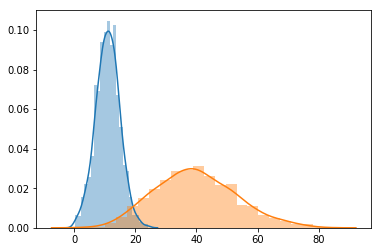

In [883]:
sns.distplot([inf_1.battlescore() for i in range(1000)])
sns.distplot([(inf_1.battlescore(attacking=True) + art_1.battlescore(attacking=True)) for i in range(1000)])

/Users/wcasey/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


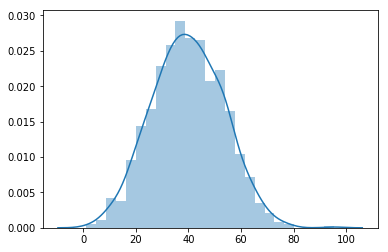